In [8]:
# Download datasets

# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

# Upload datasets to /tmp folder

import os
import zipfile
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

rock_files = os.listdir(rock_dir)
print(rock_files[:10])
paper_files = os.listdir(paper_dir)
print(paper_files[:10])
scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

# YOUR TURN

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      zoom_range=0.1)

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       batch_size=32,
                                                       target_size=(150, 150),
                                                       class_mode="binary",
                                                       seed=42)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=32,
                                                              target_size=(150, 150),
                                                              class_mode="binary",
                                                              seed=42)

--2022-05-05 11:18:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 209.85.200.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   223MB/s    in 0.9s    

2022-05-05 11:18:37 (223 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-05-05 11:18:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 209.85.200.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to:

In [9]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, 3, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),    
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])
history = model.fit(train_generator, epochs=15, steps_per_epoch = 20, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
20/20 [==============================] - 11s 417ms/step - loss: 1.0957 - accuracy: 0.3877 - val_loss: 1.0919 - val_accuracy: 0.3333
Epoch 2/15
20/20 [==============================] - 7s 374ms/step - loss: 1.0793 - accuracy: 0.4256 - val_loss: 1.0779 - val_accuracy: 0.4651
Epoch 3/15
20/20 [==============================] - 7s 372ms/step - loss: 1.0171 - accuracy: 0.5332 - val_loss: 1.0438 - val_accuracy: 0.5323
Epoch 4/15
20/20 [==============================] - 7s 366ms/step - loss: 0.9242 - accuracy: 0.5823 - val_loss: 0.9649 - val_accuracy: 0.5995
Epoch 5/15
20/20 [==============================] - 7s 365ms/step - loss: 0.8339 - accuracy: 0.6313 - val_loss: 0.8503 - val_accuracy: 0.6989
Epoch 6/15
20/20 [==============================] - 7s 371ms/step - loss: 0.7142 - accuracy: 0.7041 - val_loss: 0.7853 - val_accuracy: 0.7016
Epoch 7/15
20/20 [==============================] - 7s 373ms/step - loss: 0.5734 - accuracy: 0.7641 - val_loss: 0.6608 - val_accuracy: 0.7473
Epoch

In [10]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])
print(history.history['loss'])
print(history.history['val_loss'])

[0.3876582384109497, 0.42563292384147644, 0.5332278609275818, 0.5822784900665283, 0.6313291192054749, 0.7041139006614685, 0.7640625238418579, 0.839062511920929, 0.878125011920929, 0.8892405033111572, 0.9156249761581421, 0.934374988079071, 0.9046875238418579, 0.917187511920929, 0.953125]
[0.3333333432674408, 0.4650537669658661, 0.5322580933570862, 0.5994623899459839, 0.698924720287323, 0.7016128897666931, 0.7473118305206299, 0.8897849321365356, 0.9381720423698425, 0.9516128897666931, 0.9784946441650391, 0.9301075339317322, 0.9381720423698425, 0.9865591526031494, 0.9596773982048035]
[1.0957293510437012, 1.0792853832244873, 1.0170707702636719, 0.9241960048675537, 0.8339383006095886, 0.7141956090927124, 0.5734025835990906, 0.44356971979141235, 0.36090031266212463, 0.3184496760368347, 0.2398926317691803, 0.20465989410877228, 0.21711894869804382, 0.22239363193511963, 0.15381421148777008]
[1.0918595790863037, 1.0779389142990112, 1.043806552886963, 0.9649077653884888, 0.850281834602356, 0.7853

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

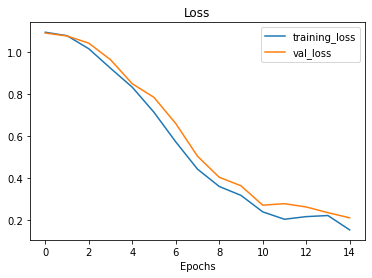

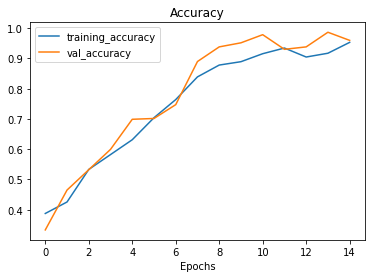

In [13]:
plot_loss_curves(history)

In [ ]:
model.save("RPS.h5")